In [1]:
import numpy as np
from matplotlib import pyplot
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop

from Data.Data import DataLoader

In [2]:
# create an instance of the DataLoader class and initialize 
distortions = ['shot_noise', 'motion_blur']  # desired distortions

# Create instances of the DataLoader class for train and test datasets
train_data_obj = DataLoader('train', distortions)
test_data_obj = DataLoader('test', distortions)

# Load the data for train and test datasets
train_data_dict = train_data_obj.load()
test_data_dict = test_data_obj.load()


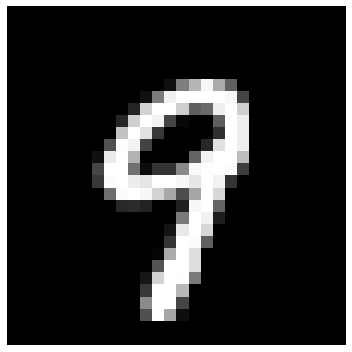

In [3]:
# display an example image
example_image = train_data_dict['clean'][123]['image']
train_data_obj.display(example_image)

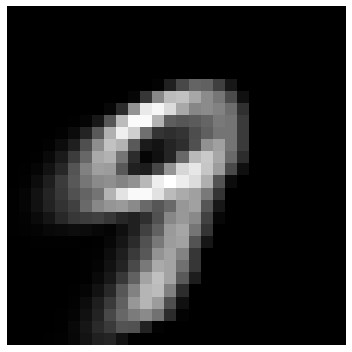

In [7]:
# display an example image
example_image = train_data_dict['motion_blur'][123]['image']
train_data_obj.display(example_image)

In [4]:
# create train/test datasets
train_size = 1000
test_size = 500

train_ratios = {'clean': 0.8, 'shot_noise': 0.6, 'motion_blur': 0.4}
test_ratios = {'clean': 0.2, 'shot_noise': 0.4, 'motion_blur': 0.6}

train_dataset = train_data_obj.create_dataset(train_size, train_ratios)
test_dataset = test_data_obj.create_dataset(test_size, test_ratios)

In [39]:
# train set
X_train = []
y_train = []

for item in train_dataset:
    X_train.append(item['image'])
    y_train.append(item['label'])

# test set
X_test = []
y_test = []

for item in test_dataset:
    X_test.append(item['image'])
    y_test.append(item['label'])
